In [33]:
# 1a

def sum_of_cubes(n):
    
    if (type(n) != int or n <= 0  ):
        return -1
    
    output = 0
    for i in range(1, n+1):
        output += i**3
        
    return output

In [32]:
# 1b

def word_lengths(sentence):
    
    splitSentence = sentence.split(" ")
    for i in range(len(splitSentence)):
        splitSentence[i] = len(splitSentence[i])
        
    return splitSentence

In [44]:
# 1c

def all_same_length(sentence):
    
    lengths = word_lengths(sentence)
    
    for i in range(len(lengths)-1):
        if lengths[i] != lengths[i+1]:
            return False
        
    return True

In [45]:
import numpy as np

In [67]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [87]:
# 2a

"""
<NumpyArray>.size represents how many values are in the array.
<NumpyArray>.shape represents how many rows and coloumns the array has.

"""

In [106]:
# 2b

def manualMultiplication(matrix, vector):
    output = []
    for i in range(matrix.shape[0]):
        multiple = 0
        for j in range(matrix.shape[1]):
            multiple += matrix[i][j] * vector[j]
        output.append(multiple)

    return np.array(output)

In [107]:
# 2c

def npMultiplication(matrix, vector):
    return np.dot(matrix, vector)

In [108]:
# 2d

np.equal(manualMultiplication(matrix, vector), npMultiplication(matrix, vector))

array([ True,  True,  True])

In [126]:
# 2e

import time

largeMatrix = np.random.rand(1000,1000)
largeVector = np.random.rand(1000)

start = time.time()
manualMultiplication(largeMatrix, largeVector)
end = time.time()
manualTime = end - start

start = time.time()
npMultiplication(largeMatrix, largeVector)
end = time.time()
npTime = end - start

print("Manual Time: ", manualTime)
print("np.dot Time: ", npTime)

Manual Time:  0.6721775531768799
np.dot Time:  0.0010013580322265625


In [127]:
import matplotlib.pyplot as plt

In [166]:
# 3a

img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

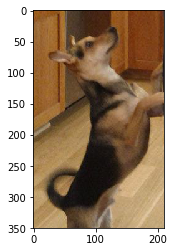

In [154]:
# 3b

plt.imshow(img)

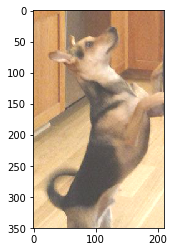

In [155]:
# 3c

img_add = img
for y in range(img_add.shape[0]):
    for x in range(img_add.shape[1]):
        img_add[y][x] += 0.25
        
img_add = np.clip(img_add, 0, 1)

plt.imshow(img_add)

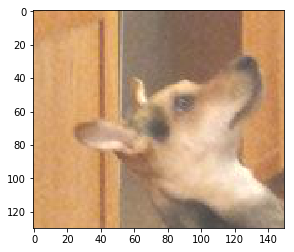

In [158]:
# 3d

img_cropped = np.clip(img[:130,:150,:3], 0, 1)
plt.imshow(img_cropped)

In [148]:
import torch

In [167]:
# 4a

img_torch = torch.from_numpy(img_cropped)

In [160]:
# 4b

img_torch.shape

torch.Size([130, 150, 3])

In [169]:
# 4c

"""
There are 130 * 150 * 3 floating point values. (58500)
"""

In [183]:
# 4d

"""
<Tensor>.transpose(0,2) changes the shape by of the tensor by changing the dimension at index 0 
with the dimension at the index 2. In this case it turns the shape from [3,150,130] to [130.150.3].
It returns a tensor. The original tensor is not changed. When calling the original variable img_torch 
after transposing it, it is the same as before.
"""

In [197]:
# 4e

"""
<Tensor>.unsqueeze(0) adds a new dimension of size one at the specified index. In this case it turns
the shape from [3,150,130] to [1,3,150,130]. It returns a tensor. It does not change the original 
tensor. 
"""

In [268]:
# 4f

maxVals = np.zeros(3)

for i in range(3):
    maxVals[i] = torch.max(img_torch[:,:,:i+1])
    
print(maxVals)

[1. 1. 1.]


In [275]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


In [ ]:
Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921

In [ ]:
img_add = 